# CosmicFish Pie v1.0   

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
snscolors=sns.color_palette("colorblind")

In [3]:
from cosmicfishpie.fishermatrix import cosmicfish

In [4]:
envkey = 'OMP_NUM_THREADS'
# Set this environment variable to the number of available cores in your machine, 
# to get a fast execution of the Einstein Boltzmann Solver
print("The value of {:s} is: ".format(envkey), os.environ.get(envkey))
os.environ[envkey] = str(8)
print("The value of {:s} is: ".format(envkey), os.environ.get(envkey))

The value of OMP_NUM_THREADS is:  None
The value of OMP_NUM_THREADS is:  8


# CosmicFish as a cosmology calculator

## Define input, options, fiducial and observables

In [5]:
fiducial = {"Omegam":0.32,
            "Omegab":0.05,
            "h":0.67,
            "ns":0.96,
            "sigma8":0.815584,
            "w0":-1.0,
            "wa":0.,
            "mnu":0.06,
            "Neff":3.044,
            }

options = {
                'accuracy': 1,
                'feedback': 1,
                'code' : 'camb',
                'camb_config_yaml' : '../boltzmann_yaml_files/camb/default.yaml',
                'outroot': 'w0waCDM-test1',
                'specs_dir' : '../survey_specifications/',        
                'survey_name': 'Euclid',
                'cosmo_model' : 'w0waCDM'}

# Photometric 3x2pt Angular Power Spectrum Observable

The 3x2pt function is the auto- and cross-correlation of observables X, Y = {L, G},  which can be combined in 3 times the 2pt-function of:
Lensing-Lensing, Galaxy-Lensing and Galaxy-Galaxy

$$
C_{ij}^{XY}(\ell) = \int^{z_{max}}_{z_{min}} \!\!\!\!\! dz  \frac{W_{i}^{X}(z) W_{j}^{Y}(z)}{H(z)r^{2}(z)} P_{\delta \delta} \! \left[ \frac{\ell+1/2}{r(z)},z \right] +N_{ij}^{XY}(\ell)
$$

where the cosmic shear window function is given by:

$$
W_i^{\gamma}(z) = \frac{3}{2} \, H_0^2 \, \Omega_m \,  (1+z) \, r(z) \int_z^{z_{max}}dz^\prime \,
    %\niof(z') 
    n_i(z^\prime)
    \left[1- \frac{r(z)}{r(z^\prime)}\right]~
$$

and the estimated number density of galaxies in each bin is given by:

$$
n_i(z) = \frac{\int_{z_i^-}^{z_i^+} dz_p n(z) p_{ph}(z_p|z)}{\int_{z_{min}}^{z_{max}}dz \int_{z_i^-}^{z_i^+}dz_p n(z) p_{ph}(z_p|z)}~
$$

which is a convolution of the theoretical mean number density with a photometric redshift error distribution:

$$
p_{ph}(z_p|z) = \frac{1-f_{out}}{\sqrt{2\pi}\sigma_b(1+z)} \exp\left\{-\frac{1}{2}\left[\frac{z-c_bz_p-z_b}{\sigma_b(1+z)}\right]^2\right\} \\ + \frac{f_{out}}{\sqrt{2\pi}\sigma_0(1+z)} \exp\left\{-\frac{1}{2}\left[\frac{z-c_0z_p-z_0}{\sigma_0(1+z)}\right]^2\right\}
$$

The full lensing function is given by the addition of cosmic shear and intrinsic alignment, which takes the following form:

$$
W_{i}^{L}(z) = W_{i}^{\gamma}(z) - W_{i}^\mathrm{IA}(z) 
$$

Moreover for IA and for photometric Galaxy clustering, the window function takes the simple form:

$$
W_{i}^\mathrm{IA}(z) = \mathcal{A}_\mathrm{IA} \mathcal{C}_\mathrm{IA}\Omega_{m,0} \frac{\mathcal{F}_\mathrm{IA}(z)}{D(z)} n_i(z) H(z)\\
W_{i}^{G}(z) = n_i(z) H(z)\, b_i(z)
$$

Here, $b_i(z)$ is the galaxy bias (the ratio between the density contrast of galaxies and dark matter).

In [6]:
observables = ['GCph', 'WL']

### Pass options and settings to cosmicfish

In [7]:
cosmoFM_A = cosmicfish.FisherMatrix(fiducialpars=fiducial,
                                        options=options, 
                                        observables=observables,
                                        cosmoModel=options['cosmo_model'],
                                        surveyName=options['survey_name'])

**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************


Custom fiducial parameters loaded

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   5.49 s
No photo-z parameters specified. Using default: Euclid-like
No IA specified. Using default: eNLA
*** Dictionary of varied parameters in this Fisher Matrix run: 
{'Omegam': 0.01, 'Omegab': 0.01, 'w0': 0.01, 'wa': 0.01, 'h': 0.01, 'ns': 0.01, 'sigma8': 0.01, 'b1': 0.06, 'b2': 0.06, 'b3': 0.06, 'b4': 0.06, 'b5': 0.06, 'b6': 0.06, 'b7': 0.06, 'b8': 0.06, 'b9': 0.06, 'b10': 0.06, 'AIA': 0.06, 'betaIA': 0.06, 'etaIA': 0.06}
                                                            ***

----------RECAP OF SELECTED OPTIONS--------

Settings:
   accuracy: 1
   feedback: 1
   code: camb
   camb_config_yaml: ../boltzmann_yaml_files/camb/default.yaml
   outroot: w0waCDM-test1
   specs_dir: ../survey_specifications/
   survey_name: Euclid
   cosmo_model: w0waCDM
   camb_path: /home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/camb
   derivati

2023-11-24 01:58:06,687	INFO worker.py:1673 -- Started a local Ray instance.


#### By setting `survey_name=Euclid` above, we have implicitly chose a default set of observational parameters to be used for the photometric probe

In [8]:
cosmoFM_A.fiducialcosmopars

{'Omegam': 0.32,
 'Omegab': 0.05,
 'h': 0.67,
 'ns': 0.96,
 'sigma8': 0.815584,
 'w0': -1.0,
 'wa': 0.0,
 'mnu': 0.06,
 'Neff': 3.044}

In [9]:
cosmoFM_A.biaspars

{'bias_model': 'binned',
 'b1': 1.0997727037892875,
 'b2': 1.220245876862528,
 'b3': 1.2723993083933989,
 'b4': 1.316624471897739,
 'b5': 1.35812370570578,
 'b6': 1.3998214171814918,
 'b7': 1.4446452851824907,
 'b8': 1.4964959071110084,
 'b9': 1.5652475842498528,
 'b10': 1.7429859437184225}

In [10]:
cosmoFM_A.photopars

{'fout': 0.1,
 'co': 1,
 'cb': 1,
 'sigma_o': 0.05,
 'sigma_b': 0.05,
 'zo': 0.1,
 'zb': 0.0}

In [11]:
cosmoFM_A.IApars

{'IA_model': 'eNLA', 'AIA': 1.72, 'betaIA': 2.17, 'etaIA': -0.41}

# Compute the Photometric angular power spectrum $C(\ell)$

In [12]:
## Import the photometric observable from an LSSsurvey as phobs
from cosmicfishpie.LSSsurvey import photo_obs as phobs

#### Declare an instance of the class

In [13]:
photo_Cls = phobs.ComputeCls(cosmoFM_A.fiducialcosmopars, 
                             cosmoFM_A.photopars, cosmoFM_A.IApars, 
                             cosmoFM_A.biaspars)


In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   5.75 s


#### Compute the actual $C_\ell$

In [14]:
phCls_A = photo_Cls.compute_all()


In class: ComputeCls  -> Computing power spectra and kernels 

In class: ComputeCls  --> Total Cls computation performed in :   1.47 s


 ##  Let's first extract the cosmological ingredients separately

In [15]:
zz = np.linspace(0.001,5.0,250)   ## declare a z-array
kk = np.logspace(np.log10(1e-3),np.log10(10),250)  ## declare a k-array

In [16]:
cosmofuncs = photo_Cls.cosmo  ## Access the cosmo attribute of the photometric observable
                              ## All observables in CF have a cosmo attribute

In [17]:
method_list = [attribute for attribute in dir(cosmofuncs) if callable(getattr(cosmofuncs, attribute)) 
               and attribute.startswith('__') is False]
print(method_list)

['E_hubble', 'Hubble', 'Omegam_of_z', 'Pcb', 'Pmm', 'SigmaMG', 'angdist', 'cmb_power', 'comoving', 'f_growthrate', 'fsigma8_of_z', 'growth', 'matpow', 'nonwiggle_pow', 'sigma8_of_z']


### Background and linear perturbations

In [18]:
chi_z = cosmofuncs.comoving(zz)
ang_z = cosmofuncs.angdist(zz)
hub_z = cosmofuncs.Hubble(zz, physical=True)
D_growth_z = cosmofuncs.growth(zz)
f_growthrate_z = cosmofuncs.f_growthrate(zz)

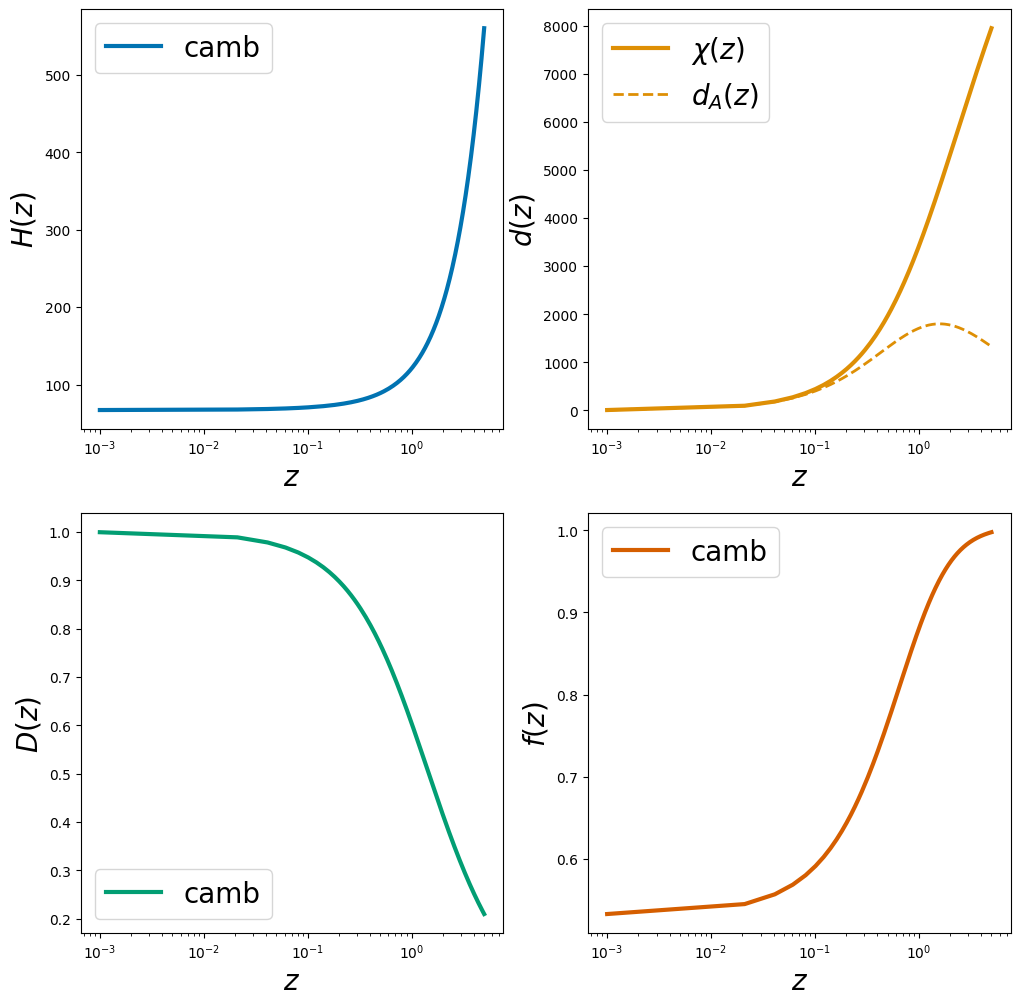

In [19]:
fig, axs = plt.subplots(2,2, figsize=(12,12))
codelab = options['code']
axs[0,0].semilogx(zz, hub_z, color=snscolors[0], lw=3, label=codelab)
axs[0,0].set_xlabel('$z$',fontsize=20)
axs[0,0].set_ylabel(r'$H(z)$',fontsize=20)
axs[0,0].legend(loc='best',fontsize=20)

axs[0,1].semilogx(zz, chi_z, color=snscolors[1], lw=3, label=r'$\chi(z)$')
axs[0,1].semilogx(zz, ang_z, color=snscolors[1], lw=2, ls='--',  label=r'$d_A (z)$')
axs[0,1].set_xlabel('$z$',fontsize=20)
axs[0,1].set_ylabel(r'$d(z)$',fontsize=20)
axs[0,1].legend(loc='best',fontsize=20)

axs[1,0].semilogx(zz, D_growth_z, color=snscolors[2], lw=3, label=codelab)
axs[1,0].set_xlabel('$z$',fontsize=20)
axs[1,0].set_ylabel(r'$D(z)$',fontsize=20)
axs[1,0].legend(loc='best',fontsize=20)

axs[1,1].semilogx(zz, f_growthrate_z, color=snscolors[3], lw=3, label=codelab)
axs[1,1].set_xlabel('$z$',fontsize=20)
axs[1,1].set_ylabel(r'$f(z)$',fontsize=20)
axs[1,1].legend(loc='best',fontsize=20)

### The matter power spectrum

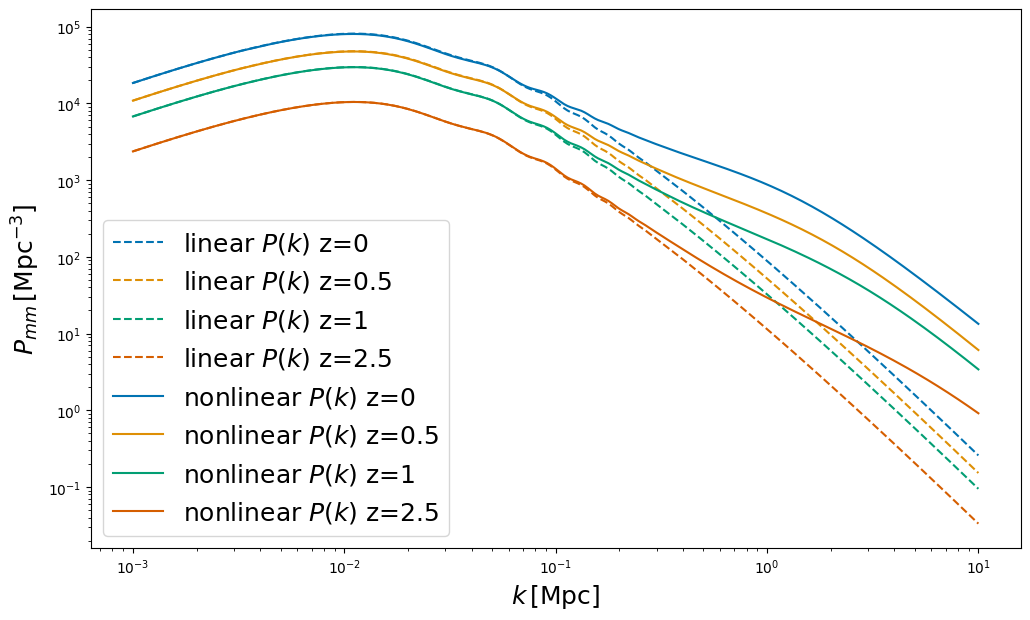

In [20]:
fig, axs = plt.subplots(1,1, figsize=(12,7))
color=iter(snscolors)
zplot = [0, 0.5, 1, 2.5]
for zii in zplot:
    c=next(color)
    axs.loglog(kk, cosmofuncs.matpow(zii, kk, nonlinear=False), ls='--', c=c, label='linear $P(k)$ z=%s'%zii)
axs.set_xlabel(r'$k \, [\mathrm{Mpc}]$', fontsize=18)
axs.set_ylabel(r'$P_{mm} \, [\mathrm{Mpc}^{-3}]$', fontsize=18)
color=iter(snscolors)
for zii in zplot:
    c=next(color)
    axs.loglog(kk, cosmofuncs.matpow(zii, kk, nonlinear=True), ls='-', c=c, label='nonlinear $P(k)$ z=%s'%zii)
axs.legend(fontsize=18)

### Extract the Window Functions from Cosmicfish

In [21]:
zz = np.linspace(0.001, 2.5, 250)   ## Euclid specs are only defined up to z=3.

In [22]:
ph_window = photo_Cls.window

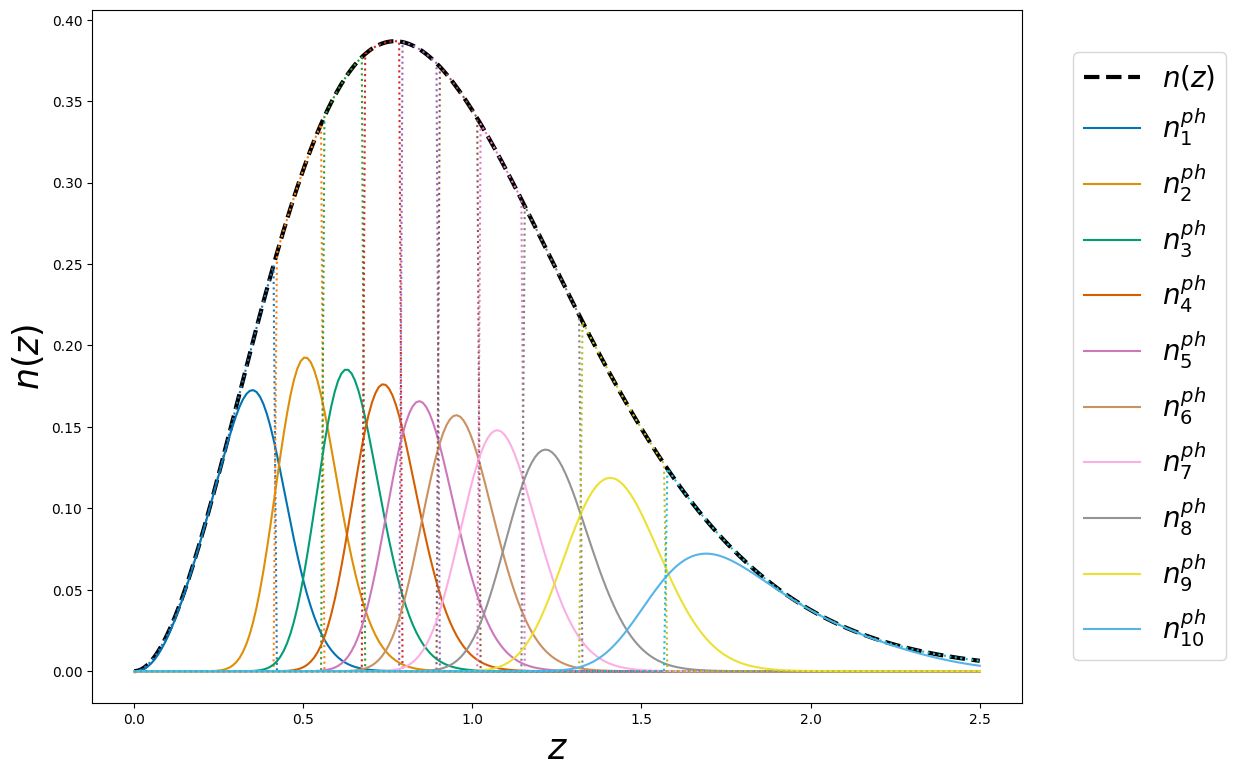

In [23]:
#Full window function and binned photo n(z) distribution
window = photo_Cls.window

color=iter(snscolors)
plt.figure(figsize=(12, 9))
plt.plot(zz, window.dNdz(zz),label=r'$n(z)$', color='k', lw=3, ls='--')
for ind in photo_Cls.binrange:
    c = next(color)
    plt.plot(zz, window.ngal_photoz(zz, ind), label=r'$n^{ph}_{%s}$' %ind, color=c)
    plt.plot(zz, window.n_i(zz, ind), ls=':') #label=r'dNi bin-'+str(ind), color=c)
plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$n(z)$',fontsize=25)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)

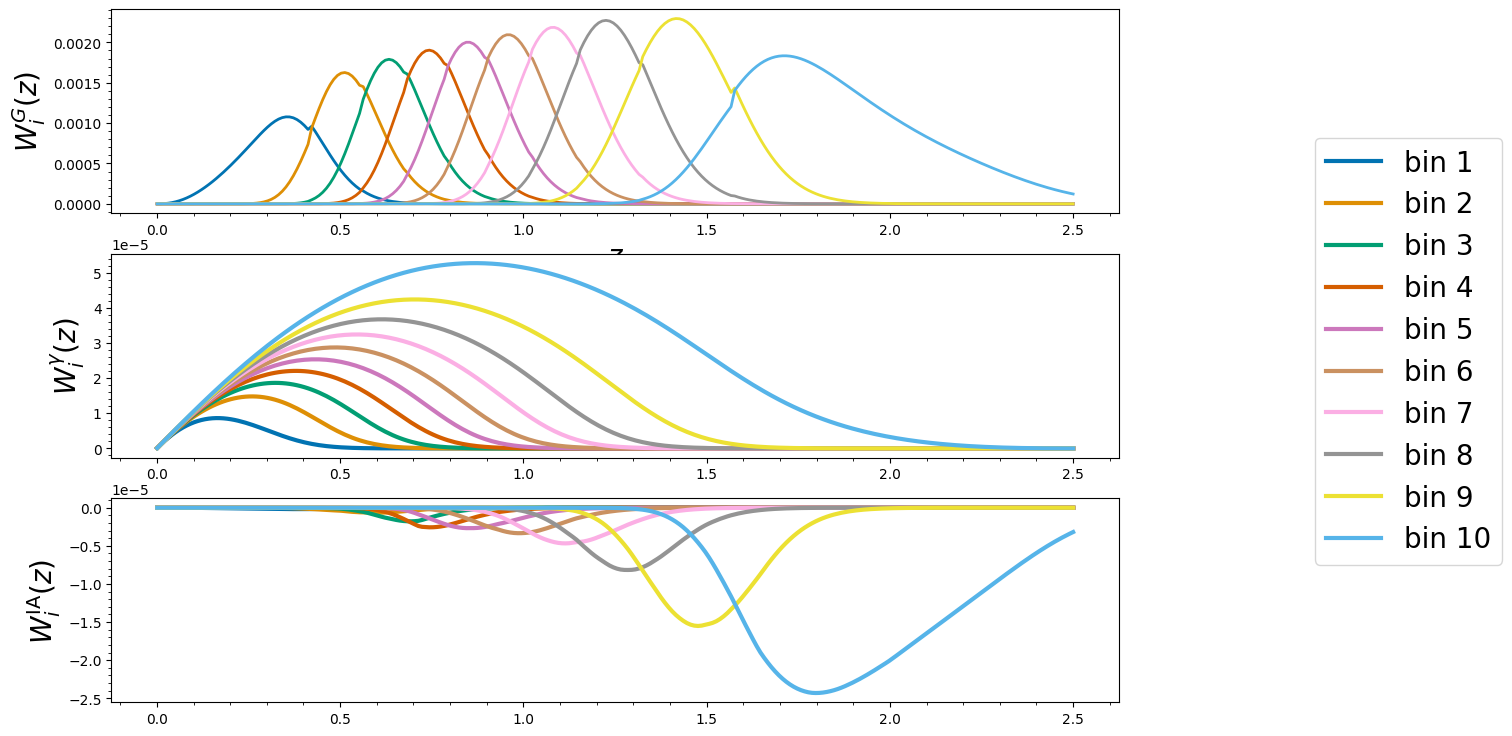

<Figure size 1000x800 with 0 Axes>

In [24]:
#Testing the generation of kernels and Cls

color=iter(snscolors)
fig, axs = plt.subplots(3,1, figsize=(13,9))
plt.figure(figsize=(10, 8))
for ind in photo_Cls.binrange:
    c = next(color)
    axs[0].plot(zz, photo_Cls.genwindow(zz, 'GCph', ind)[0], lw=2., color=c)
    axs[1].plot(zz, photo_Cls.genwindow(zz,   'WL', ind)[0], lw=3., color=c)
    axs[2].plot(zz, photo_Cls.genwindow(zz,   'WL', ind)[1], lw=3., color=c, label=r'bin %s' %ind)
axs[0].set_xlabel(r'$z$',fontsize=20)

axs[0].set_ylabel(r'$W_i^{G}(z)$',fontsize=20)
axs[1].set_ylabel(r'$W_i^{\gamma}(z)$',fontsize=20)
axs[2].set_ylabel(r'$W_i^\mathrm{IA}(z)$',fontsize=20)
axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
#axs[0].legend()
fig.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=20)

## Finally plot the 3x2pt $C^{XY}_{ij}(\ell) $

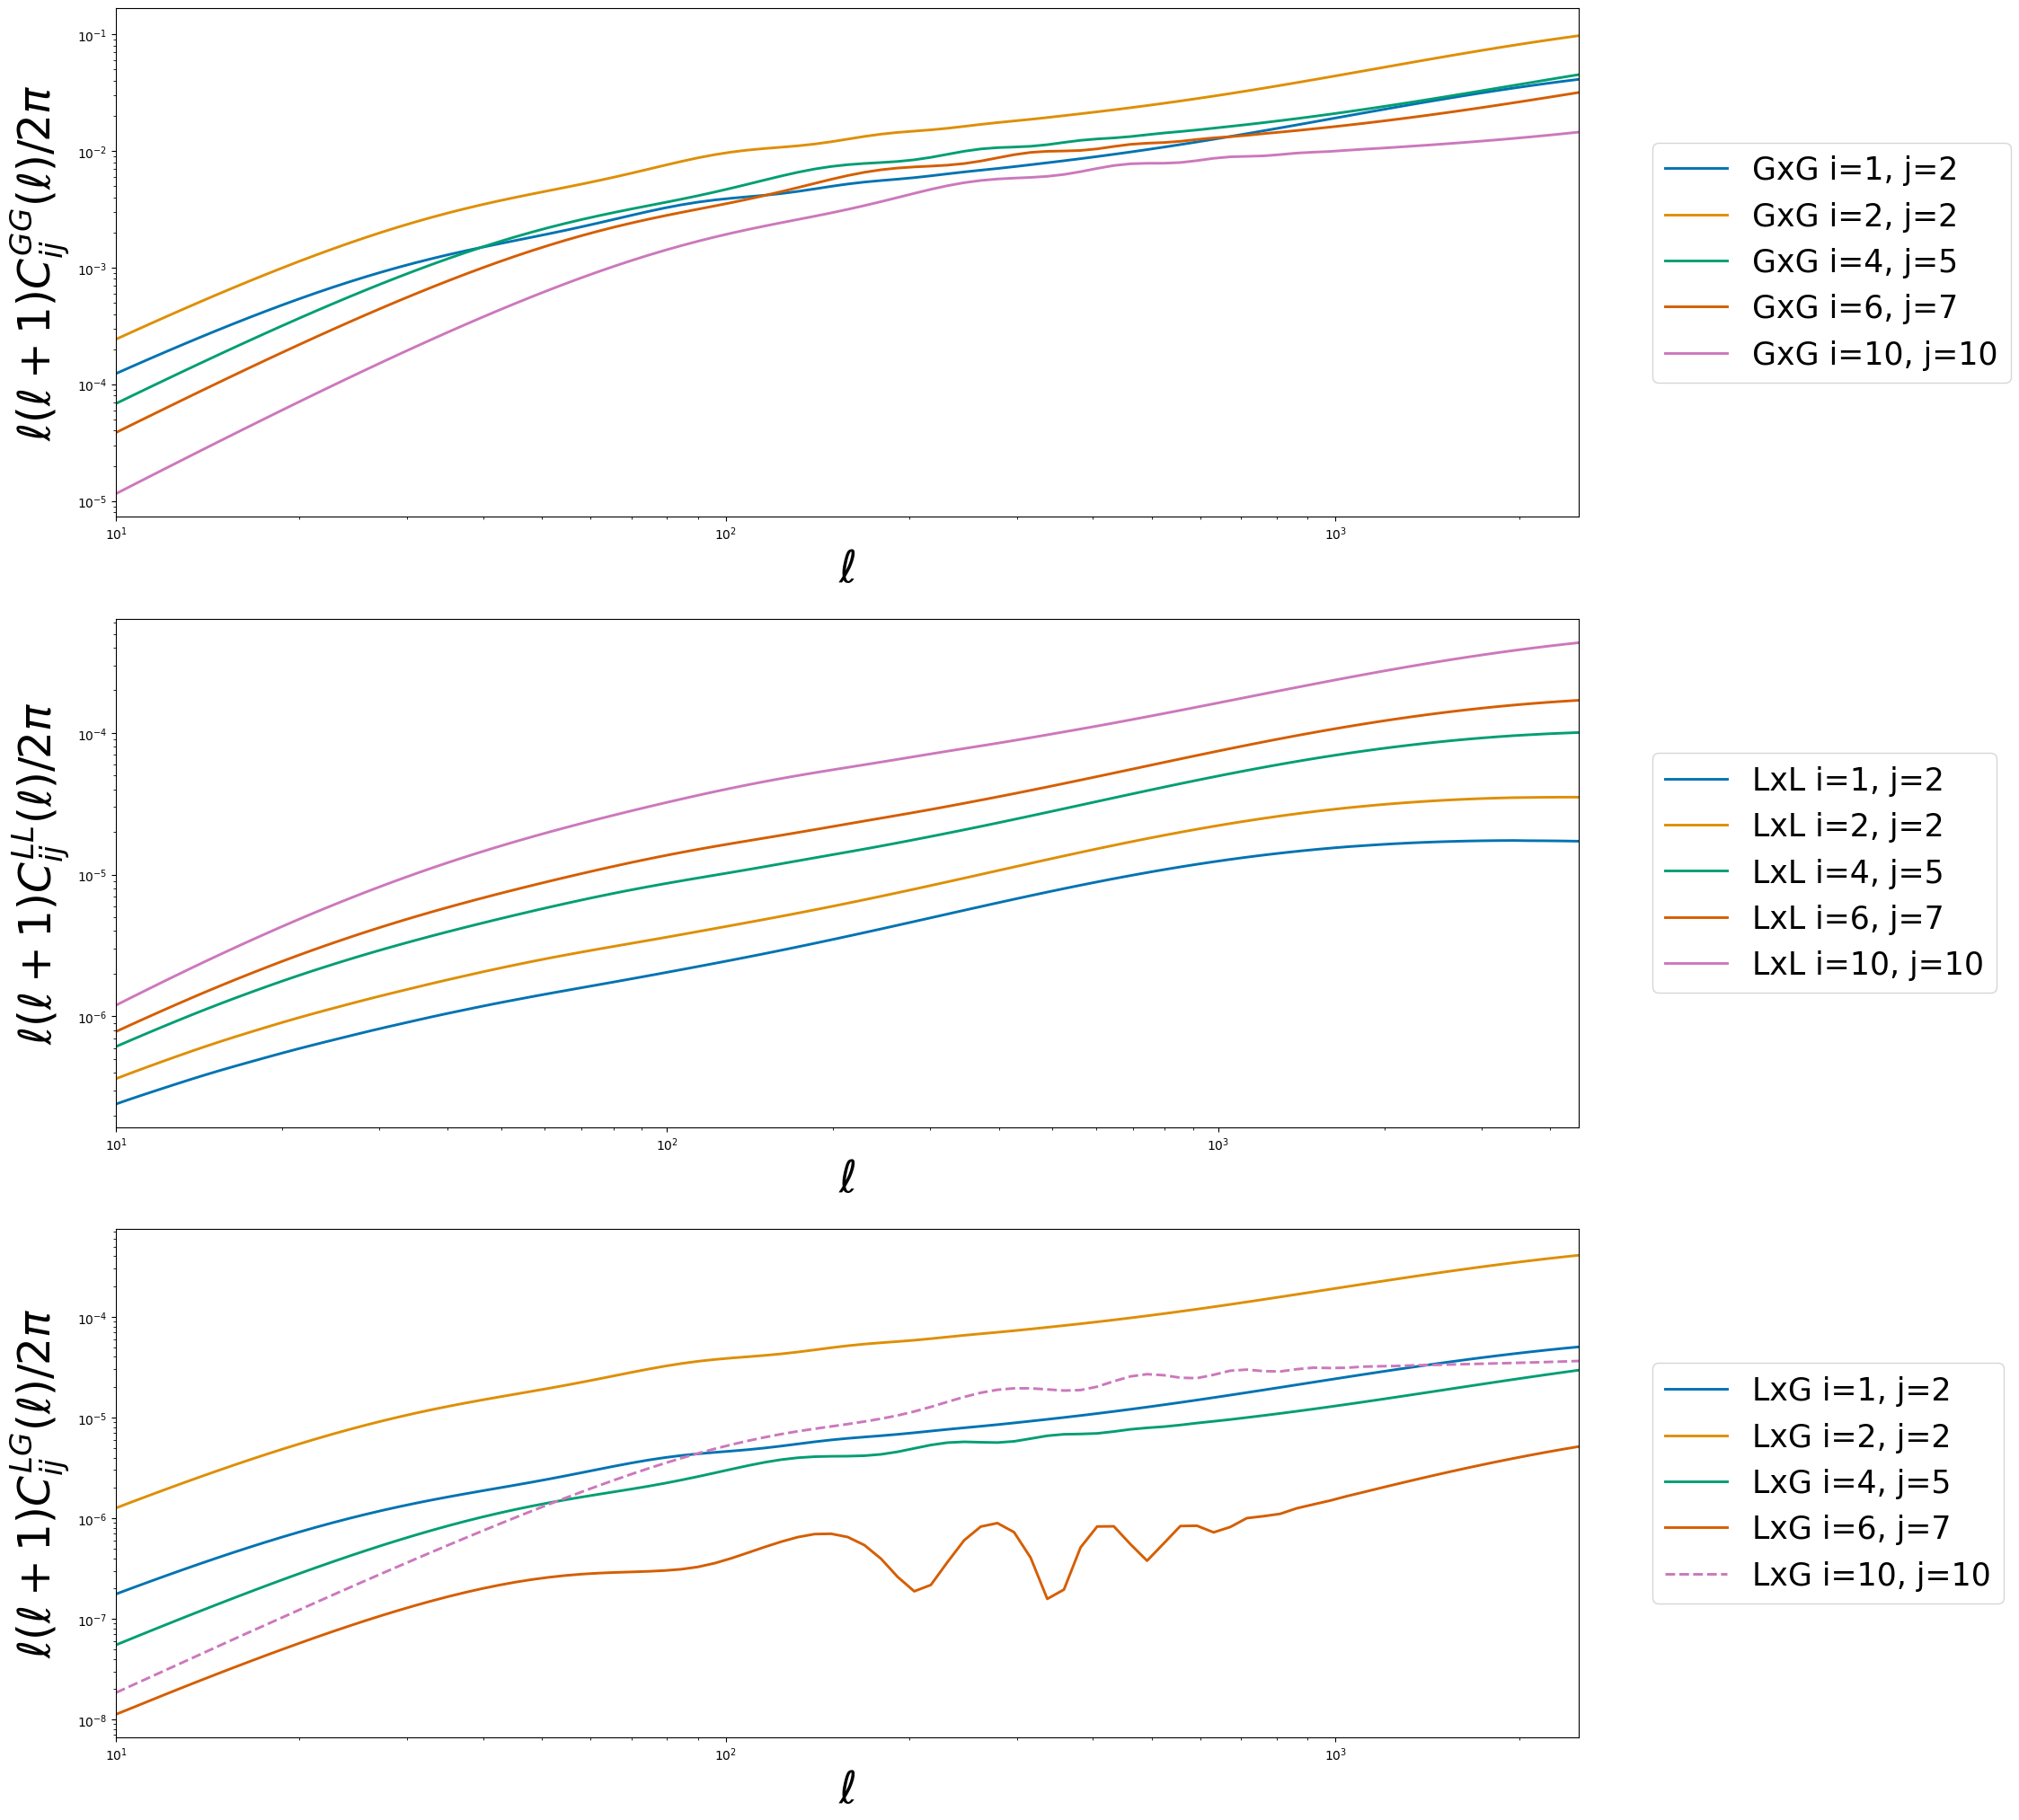

In [25]:
#Accessing LSS cls
cls = photo_Cls.result
l = cls['ells']
norm = l*(l+1)/(2*np.pi)

color=iter(snscolors)
fig, axs = plt.subplots(3,1, figsize=(21,25))
for bin1, bin2 in zip([1,2,4,6,10], [2,2,5,7,10]):
    c = next(color)   
    axs[0].loglog(l, norm*cls['GCph '+str(bin1)+'xGCph '+str(bin2)], color=c,
                label='GxG i='+str(bin1)+', j='+str(bin2), ls='-', lw=2.1)
    axs[1].loglog(l, norm*cls['WL '+str(bin1)+'xWL '+str(bin2)], color=c,
                label='LxL i='+str(bin1)+', j='+str(bin2), ls='-', lw=2.1)
    corr = norm*cls['WL '+str(bin1)+'xGCph '+str(bin2)]
    if np.mean(corr) < 0:
        ls = '--'
    else:
        ls = '-'
    axs[2].loglog(l, abs(corr), color=c,
                label='LxG i='+str(bin1)+', j='+str(bin2), ls=ls, lw=2.1)
axs[0].set_xlabel(r'$\ell$',fontsize=35)
axs[0].set_ylabel(r'$\ell(\ell+1)C_{ij}^{GG}(\ell)/2\pi$',fontsize=35)
axs[0].legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=25)
axs[0].set_xlim(10, 2500)
axs[1].set_xlabel(r'$\ell$',fontsize=35)
axs[1].set_ylabel(r'$\ell(\ell+1)C_{ij}^{LL}(\ell)/2\pi$',fontsize=35)
axs[1].legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=25)
axs[1].set_xlim(10, 4500)
axs[2].set_xlabel(r'$\ell$',fontsize=35)
axs[2].set_ylabel(r'$\ell(\ell+1)C_{ij}^{LG}(\ell)/2\pi$',fontsize=35)
axs[2].legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=25)
axs[2].set_xlim(10, 2500)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

# Spectroscopic Power Spectrum

The observed power spectrum of galaxies can be related to the mater power spectrum by 

$$
P^\mathrm{th} = q_\| \times  q_\perp^2 \times K \times \mathrm{FoG} \times \mathrm{Err} \times P_{mm} + P^\mathrm{shot}.
$$
The factors in front are due to different observational effects. The factor $q_\|$ and $q_\perp$ are coming from the fact that we can only observe the redshift of galaxies and not their position.
To calculate the power spectrum we have to settle for a reference transformation. If this is different from the cosmology we used to compute the power spectrum in, we find 
$$
q_\| = H(z)/H^\mathrm{ref}(z) \quad\text{and}\quad q_\perp = D_A^\mathrm{ref}(z)/D_A(z)
$$

The factors $q_\mathrm{RSD}$ and $q_\mathrm{FOG}$ describe redshift space distortions and are given by
$$
K = \left(b+f\,\mu^2\right)^2\\
\mathrm{FoG} = 1+\left[f\,\sigma_p\,\mu^2\right]^2

$$
where $\mu$ denotes the angle under which we observe the structures.
The factor $q_\sigma$ is due to the resolution of the instrument and is given by
$$
\mathrm{Err} = \exp\left[-\sigma^2_\|\, k^2\, \mu^2 -\sigma_\perp^2 \,k^2\,\left(1- \mu^2\right)\right].
$$
Finaly, $P^\mathrm{shot}$ just is a constant term we add for shot noise.
The nonlinear power spectrum $P_{mm}$ is approximated as 
$$
P_{mm} \approx P_{dw} \coloneqq P_{mm}^\mathrm{lin}\,e^{-g} + P_{mm}\,(1-e^g),\\
g= \sigma_v^2 k^2\, \left((1-\mu^2)+\mu^2(1+f)^2\right)
$$

In [26]:
observables = ['GCsp']

### Pass options and settings to cosmicfish

In [27]:
cosmoFM_B = cosmicfish.FisherMatrix(fiducialpars=fiducial,
                                        options=options, 
                                        observables=observables,
                                        cosmoModel=options['cosmo_model'],
                                        surveyName=options['survey_name'])

**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Custom fiducial parameters loaded

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   5.63 s
No photo-z parameters specified. Using default: Euclid-like
No IA specified. Using default: eNLA
*** Dictionary of varied parameters in this Fisher Matrix run: 
{'Omegam': 0.01, 'Omegab': 0.01, 'w0': 0.01, 'wa': 0.01, 'h': 0.01, 'ns': 0.01, 'sigma8': 0.01, 'lnbgs8_1': 0.0001, 'lnbgs8_2': 0.0001, 'lnbgs8_3': 0.0001, 'lnbgs8_4': 0.0001, 'Ps_1': 0.0001, 'Ps_2': 0.0001, 'Ps_3': 0.0001, 'Ps_4': 0.0001}
                                          

2023-11-24 02:01:27,967	INFO worker.py:1673 -- Started a local Ray instance.


### Calculate the Power Spectrum

In [32]:
## Import the spectroscopic observable from an LSSsurvey as spobs
from cosmicfishpie.LSSsurvey import spectro_obs as spobs

spectro_Pk = spobs.ComputeGalSpectro(cosmoFM_B.fiducialcosmopars)


In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s


### "De-wiggling" of the Power Spectrum

To calculate the observed power spectrum we need to dewiggle it to find the non linear correction 

(0.01, 0.4)

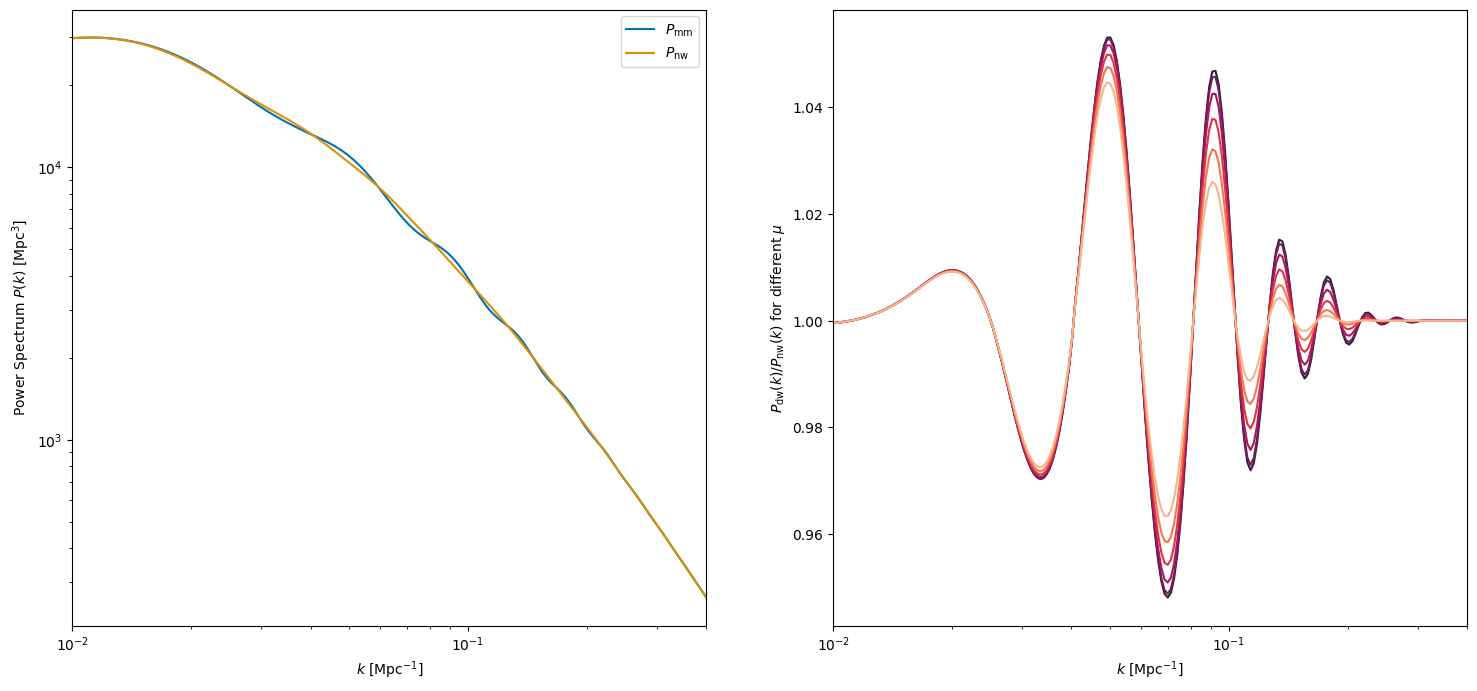

In [33]:
z=1
kk= np.logspace(-2,np.log10(0.4),200)

fig, axs = plt.subplots(1,2,figsize=(18,8))

color = iter(snscolors)

c = next(color)
axs[0].loglog(kk,spectro_Pk.cosmo.Pmm(z,kk),c=c,label='$P_\mathrm{mm}$')
c = next(color)
axs[0].loglog(kk,spectro_Pk.cosmo.nonwiggle_pow(z,kk),c=c,label='$P_\mathrm{nw}$')
axs[0].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[0].set_ylabel('Power Spectrum $P(k)$ [$\mathrm{Mpc}^{3}$]')
axs[0].legend()
axs[0].set_xlim([1e-2,0.4])

colormap = sns.color_palette("rocket")
colors = iter(colormap)
mus = np.linspace(0,1,6)
for mu in mus:
    c = next(colors)
    axs[1].plot(kk,spectro_Pk.dewiggled_pdd(z,kk,mu)/spectro_Pk.normalized_pnw(z,kk),c=c)

axs[1].set_xscale('log')
axs[1].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[1].set_ylabel('$P_\mathrm{dw}(k)$/$P_\mathrm{nw}(k)$ for different $\mu$')
axs[1].set_xlim([1e-2,0.4])


#### Compute the observed power spectrum at different redshifts and different angles 


In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s


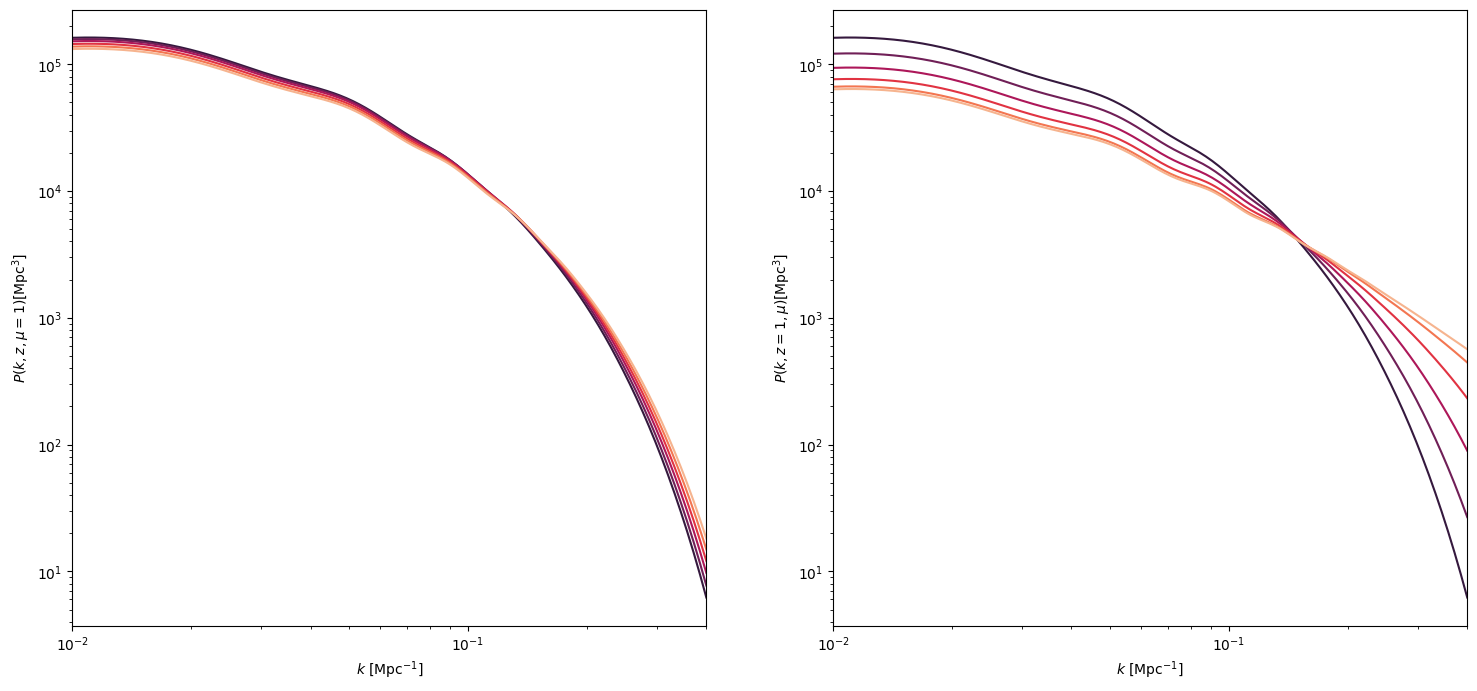

In [34]:

fig, axs = plt.subplots(1,2,figsize=(18,8))

colormap = sns.color_palette("rocket")
colors = iter(colormap)

zz= np.linspace(1,2,6)
for z in zz:
    c = next(colors)
    #axs[0].plot(kk,spectro_Pk.observed_Pgg(z,kk,1)/spectro_Pk.observed_Pgg(1,kk,1),c=c)
    axs[0].loglog(kk,spectro_Pk.observed_Pgg(z,kk,1),c=c)

axs[0].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[0].set_ylabel('$P(k,z,\mu=1)[\mathrm{Mpc}^3]$')
axs[0].set_xlim([1e-2,0.4])
axs[0].set_xscale('log')

colormap = sns.color_palette("rocket")
colors = iter(colormap)
mus = np.linspace(1,0,6)
for mu in mus:
    c = next(colors)
    #axs[1].plot(kk,spectro_Pk.observed_Pgg(1,kk,mu)/spectro_Pk.observed_Pgg(1,kk,1),c=c)
    axs[1].loglog(kk,spectro_Pk.observed_Pgg(1,kk,mu),c=c)

axs[1].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[1].set_ylabel('$P(k,z=1,\mu)[\mathrm{Mpc}^3]$')
axs[1].set_xlim([1e-2,0.4])
axs[1].set_xscale('log')


### Compare the Power Spectrum from two different cosmologies

In [36]:
sample = {"Omegam":0.32,
          "Omegab":0.06, #20% higher than the fiducial
          "h":0.737, #10% higher than the fiducal
          "ns":0.96,
          "sigma8":0.815584,
          "w0":-1.0,
          "wa":0.,
          "mnu":0.06,
          "Neff":3.044,
          }

spectro_Pk_sampled = spobs.ComputeGalSpectro(sample, cosmoFM_B.fiducialcosmopars)



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   5.52 s



In class: ComputeGalSpectro  observed P_gg computation took:   0.01 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.01 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.01 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.01 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.01 s


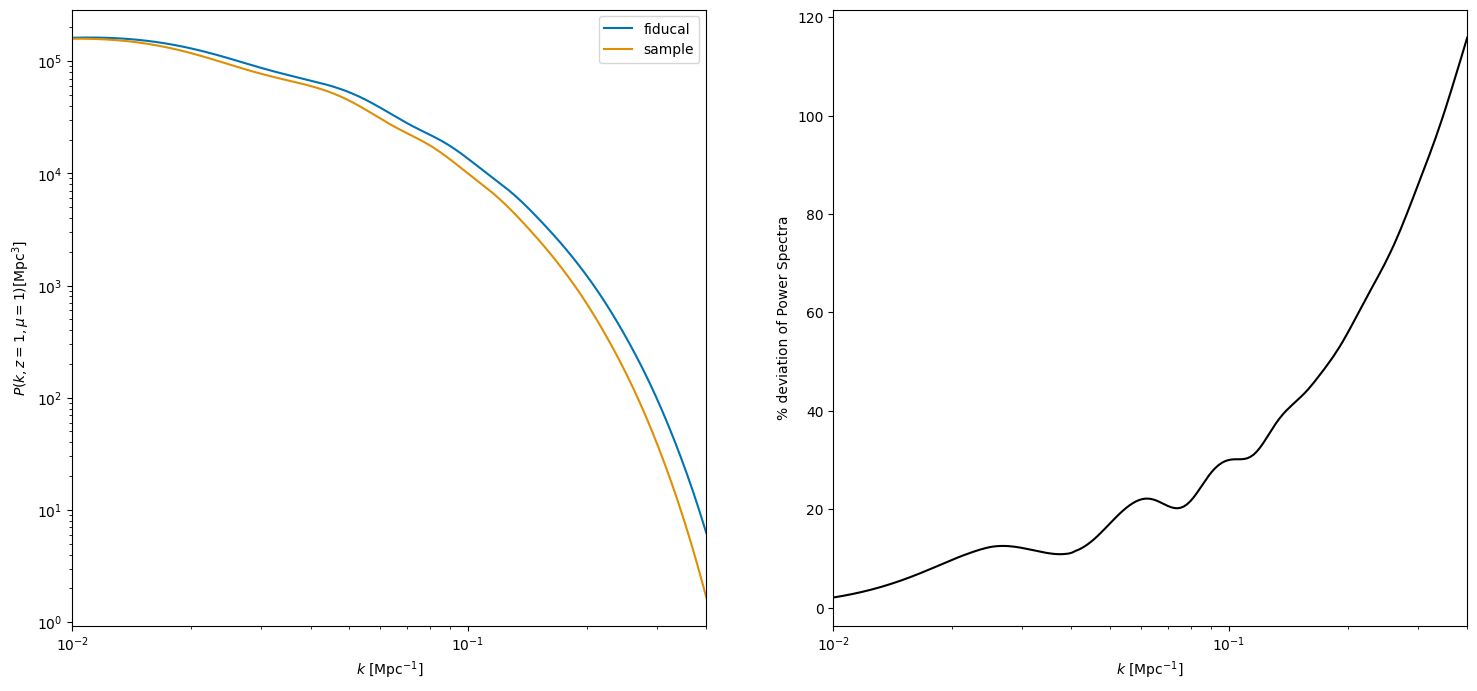

In [37]:
fig, axs = plt.subplots(1,2,figsize=(18,8))

colormap = sns.color_palette("colorblind")
colors = iter(colormap)

c = next(colors)
axs[0].loglog(kk,spectro_Pk.observed_Pgg(1,kk,1),c=c,label='fiducal')

c = next(colors)
axs[0].loglog(kk,spectro_Pk_sampled.observed_Pgg(1,kk,1),c=c,label='sample')

axs[0].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[0].set_ylabel('$P(k,z=1,\mu=1)[\mathrm{Mpc}^3]$')
axs[0].set_xlim([1e-2,0.4])
axs[0].legend()
axs[0].set_xscale('log')

axs[1].plot(kk,(spectro_Pk.observed_Pgg(1,kk,1)-spectro_Pk_sampled.observed_Pgg(1,kk,1))/(spectro_Pk.observed_Pgg(1,kk,1)+spectro_Pk_sampled.observed_Pgg(1,kk,1))*200,c='black')

axs[1].set_xlabel('$k$ [$\mathrm{Mpc}^{-1}$]')
axs[1].set_ylabel(r'% deviation of Power Spectra')
axs[1].set_xlim([1e-2,0.4])
axs[1].set_xscale('log')
